In [34]:
#/content/sample_data/netflix.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [19]:
data_by_csv=pd.read_csv("/content/sample_data/netflix.csv")
data_by_csv.head() # default for first 5 rows


data_replaced = data_by_csv.replace([0, 'Not Given'], np.nan) # Replace 0, 'Not Given' with NaN
data_replaced


data_dropped = data_replaced.dropna() # Drop rows with NaN values
data_dropped


data_null=data_dropped.isnull().sum()#count the total number of null values
data_null

data_duplicate=data_dropped.duplicated().sum()#drop any duplicates
data_duplicate

data=data_dropped.copy()#to copy to simple
data

data



data.to_csv("cleaned_netflix.csv",index=False)

Graph for total number of TV Shows (series) released per year in Netflix OTT


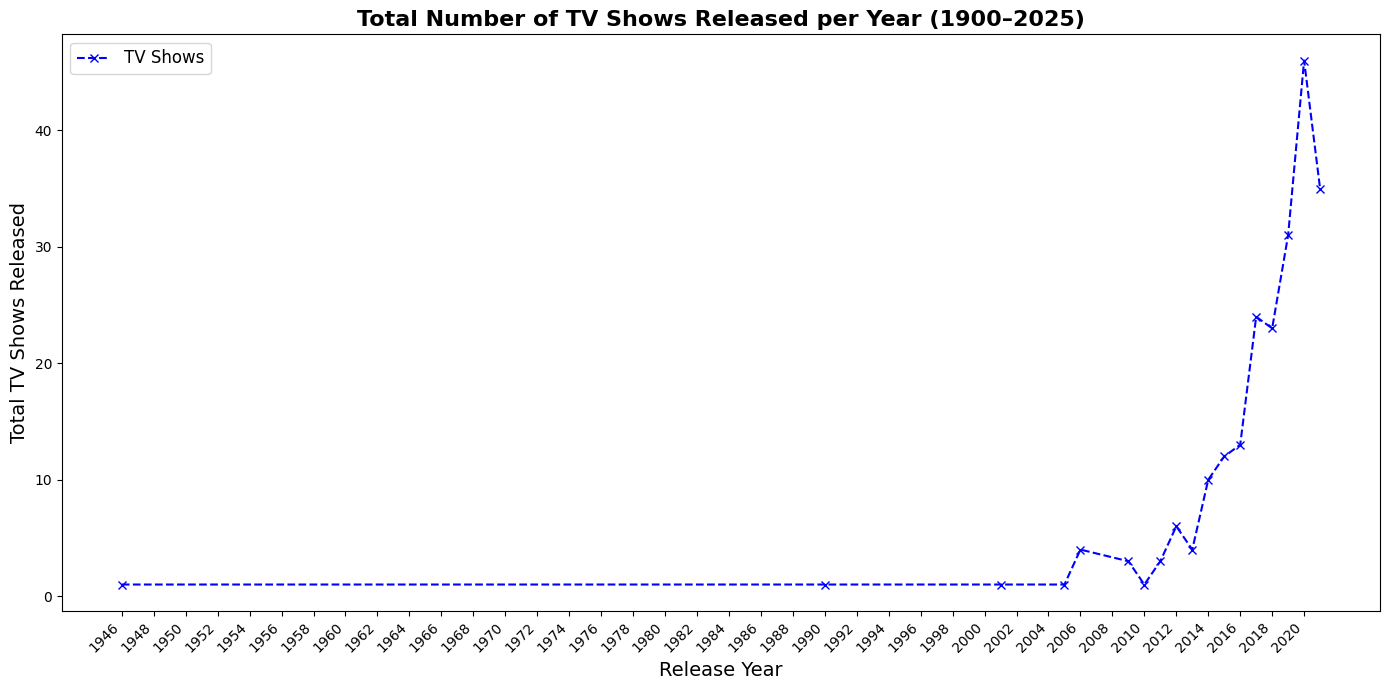

In [20]:
data = pd.read_csv("cleaned_netflix.csv")

print('Graph for total number of TV Shows (series) released per year in Netflix OTT')
filtered_df = data[(data['release_year'] >= 1900) & (data['release_year'] <= 2025)]

tv_per_year = filtered_df[filtered_df['type'] == 'TV Show'].groupby('release_year').size().reset_index(name='total_tv_shows')
tv_per_year = tv_per_year.sort_values('release_year')

plt.figure(figsize=(14, 7))
plt.plot(tv_per_year['release_year'], tv_per_year['total_tv_shows'], marker='x', linestyle='--', color='b', label='TV Shows')

plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Total TV Shows Released', fontsize=14)
plt.title('Total Number of TV Shows Released per Year (1900–2025)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)

plt.xticks(ticks=range(int(tv_per_year['release_year'].min()), int(tv_per_year['release_year'].max())+1, 2), rotation=45, ha='right')

plt.tight_layout()



plt.show()

Graph for total number of TV Shows (series) released per year in Netflix OTT (India only)


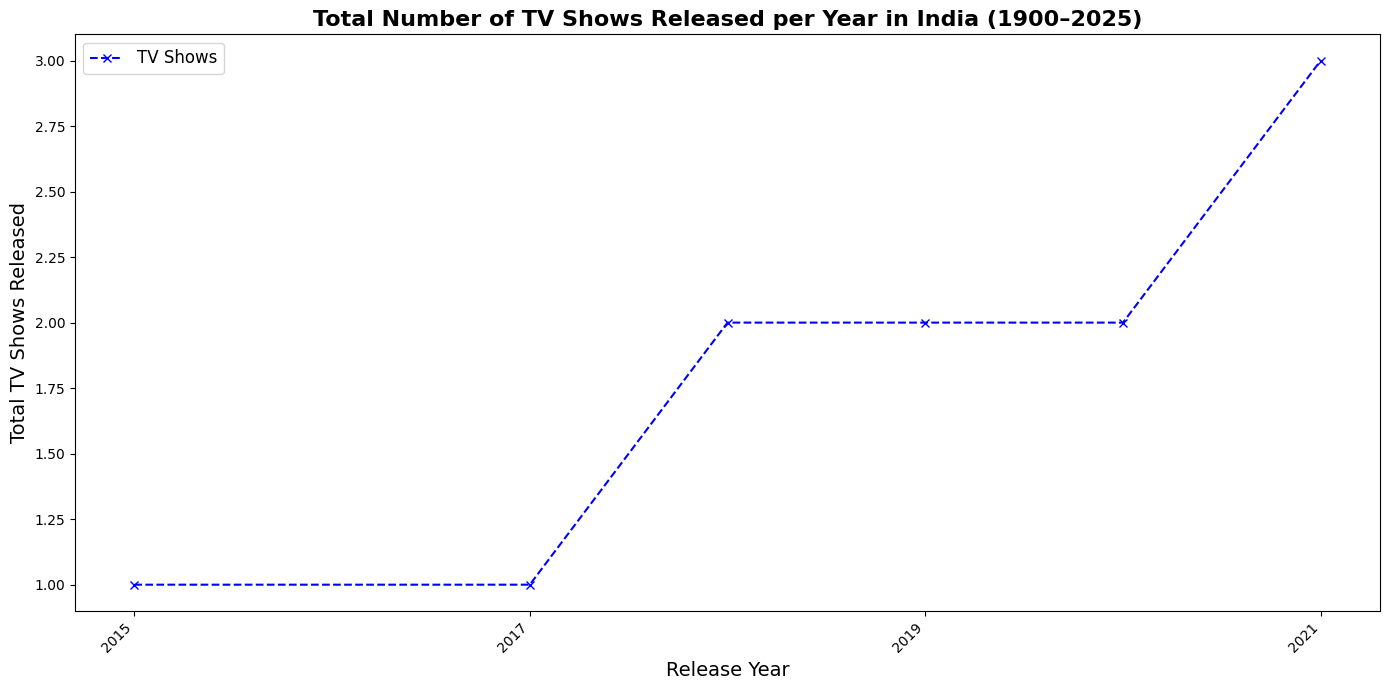

In [21]:
data = pd.read_csv("cleaned_netflix.csv")

data_india = data[data['country'].str.contains('India', na=False)]

print('Graph for total number of TV Shows (series) released per year in Netflix OTT (India only)')

filtered_df = data_india[(data_india['release_year'] >= 1900) & (data_india['release_year'] <= 2025)]

tv_per_year = filtered_df[filtered_df['type'] == 'TV Show'].groupby('release_year').size().reset_index(name='total_tv_shows')
tv_per_year = tv_per_year.sort_values('release_year')

plt.figure(figsize=(14, 7))
plt.plot(tv_per_year['release_year'], tv_per_year['total_tv_shows'], marker='x', linestyle='--', color='b', label='TV Shows')

plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Total TV Shows Released', fontsize=14)
plt.title('Total Number of TV Shows Released per Year in India (1900–2025)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)

plt.xticks(ticks=range(int(tv_per_year['release_year'].min()), int(tv_per_year['release_year'].max())+1, 2), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Graph for total number of TV Shows (series) released per year in Netflix OTT (South Korea only)


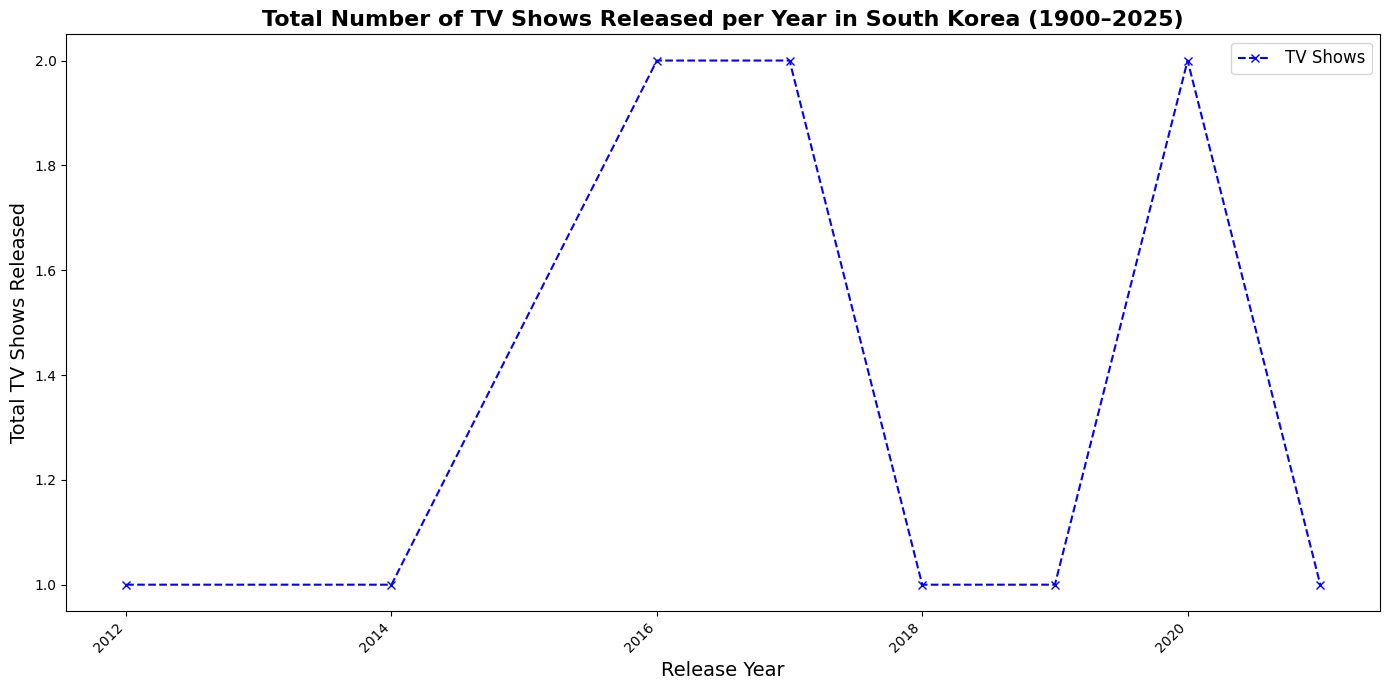

In [22]:
data = pd.read_csv("cleaned_netflix.csv")

data_korea = data[data['country'].str.contains('South Korea', na=False)]

print('Graph for total number of TV Shows (series) released per year in Netflix OTT (South Korea only)')

filtered_df = data_korea[(data_korea['release_year'] >= 1900) & (data_korea['release_year'] <= 2025)]

tv_per_year = filtered_df[filtered_df['type'] == 'TV Show'].groupby('release_year').size().reset_index(name='total_tv_shows')
tv_per_year = tv_per_year.sort_values('release_year')

plt.figure(figsize=(14, 7))
plt.plot(tv_per_year['release_year'], tv_per_year['total_tv_shows'], marker='x', linestyle='--', color='b', label='TV Shows')

plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Total TV Shows Released', fontsize=14)
plt.title('Total Number of TV Shows Released per Year in South Korea (1900–2025)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)

plt.xticks(ticks=range(int(tv_per_year['release_year'].min()), int(tv_per_year['release_year'].max())+1, 2), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Graph for total number of TV Shows (series) released per year in Netflix OTT (USA only)


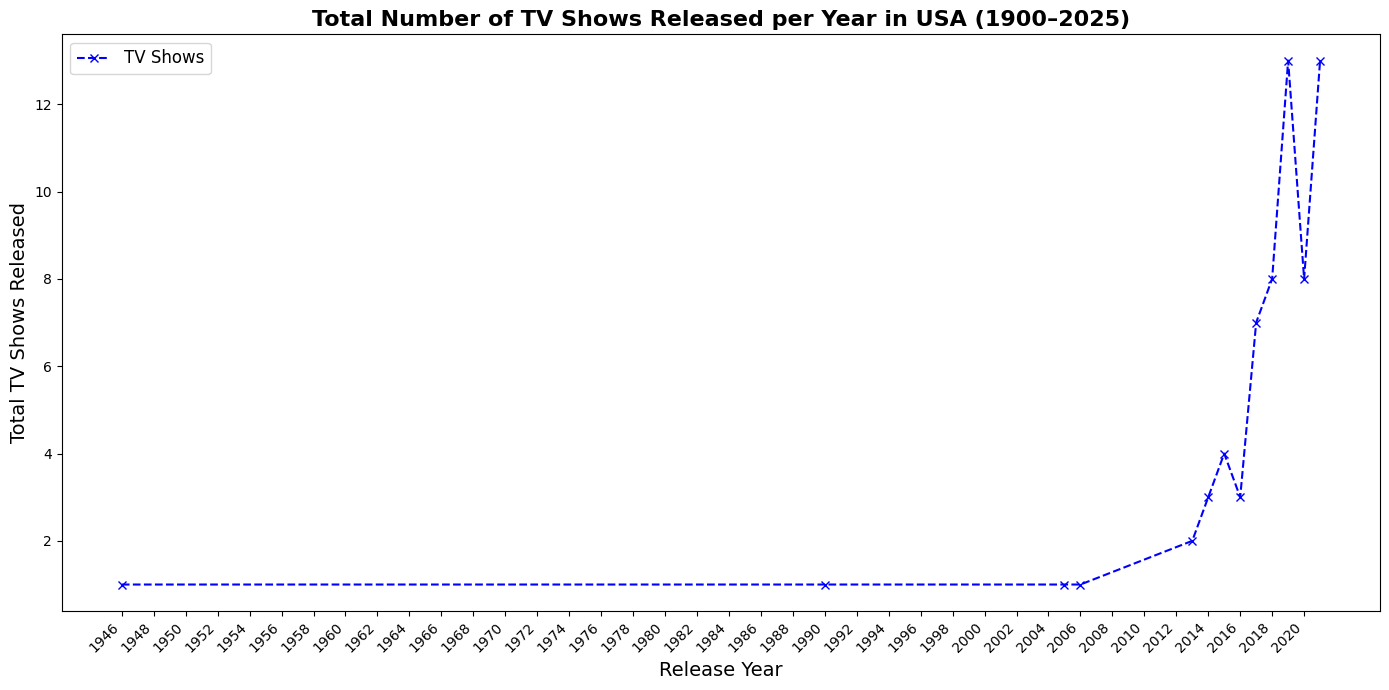

In [24]:
data = pd.read_csv("cleaned_netflix.csv")

data_usa = data[data['country'].str.contains('United States', na=False)]

print('Graph for total number of TV Shows (series) released per year in Netflix OTT (USA only)')

filtered_df = data_usa[(data_usa['release_year'] >= 1900) & (data_usa['release_year'] <= 2025)]

tv_per_year = filtered_df[filtered_df['type'] == 'TV Show'].groupby('release_year').size().reset_index(name='total_tv_shows')
tv_per_year = tv_per_year.sort_values('release_year')

plt.figure(figsize=(14, 7))
plt.plot(tv_per_year['release_year'], tv_per_year['total_tv_shows'], marker='x', linestyle='--', color='b', label='TV Shows')

plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Total TV Shows Released', fontsize=14)
plt.title('Total Number of TV Shows Released per Year in USA (1900–2025)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)

plt.xticks(ticks=range(int(tv_per_year['release_year'].min()), int(tv_per_year['release_year'].max())+1, 2), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Graph for total number of Movies and TV Shows released per year in Netflix OTT


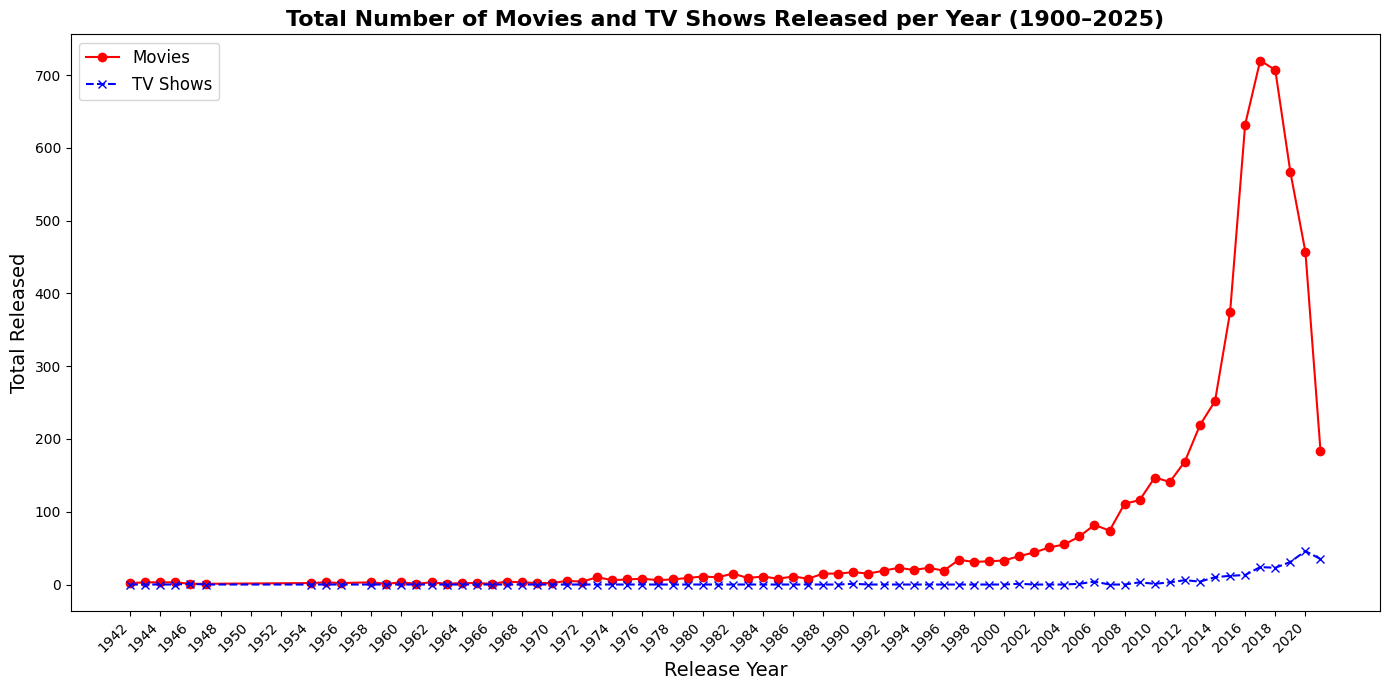

In [25]:
data = pd.read_csv("cleaned_netflix.csv")

print('Graph for total number of Movies and TV Shows released per year in Netflix OTT')
filtered_df = data[(data['release_year'] >= 1900) & (data['release_year'] <= 2025)]

movies_per_year = filtered_df[filtered_df['type'] == 'Movie'].groupby('release_year').size().reset_index(name='total_movies')
tv_per_year = filtered_df[filtered_df['type'] == 'TV Show'].groupby('release_year').size().reset_index(name='total_tv_shows')
merged = pd.merge(movies_per_year, tv_per_year, on='release_year', how='outer').fillna(0)
merged = merged.sort_values('release_year')

plt.figure(figsize=(14, 7))
plt.plot(merged['release_year'], merged['total_movies'], marker='o', linestyle='-', color='r', label='Movies')
plt.plot(merged['release_year'], merged['total_tv_shows'], marker='x', linestyle='--', color='b', label='TV Shows')

plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Total Released', fontsize=14)
plt.title('Total Number of Movies and TV Shows Released per Year (1900–2025)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)

plt.xticks(ticks=range(int(merged['release_year'].min()), int(merged['release_year'].max())+1, 2), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Graph for total number of Movies and TV Shows released per year in Netflix OTT (India only)


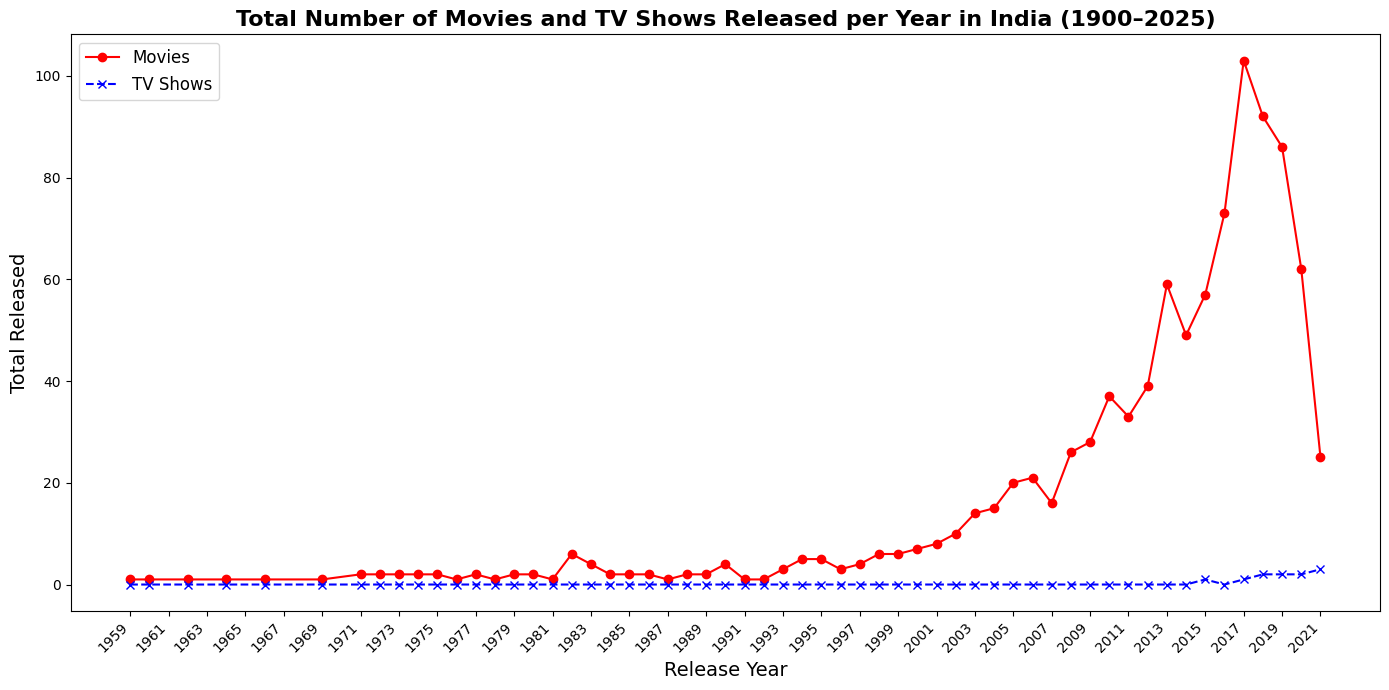

In [26]:
data = pd.read_csv("cleaned_netflix.csv")

data_india = data[data['country'].str.contains('India', na=False)]

print('Graph for total number of Movies and TV Shows released per year in Netflix OTT (India only)')
filtered_df = data_india[(data_india['release_year'] >= 1900) & (data_india['release_year'] <= 2025)]

movies_per_year = filtered_df[filtered_df['type'] == 'Movie'].groupby('release_year').size().reset_index(name='total_movies')
tv_per_year = filtered_df[filtered_df['type'] == 'TV Show'].groupby('release_year').size().reset_index(name='total_tv_shows')

merged = pd.merge(movies_per_year, tv_per_year, on='release_year', how='outer').fillna(0)
merged = merged.sort_values('release_year')

plt.figure(figsize=(14, 7))
plt.plot(merged['release_year'], merged['total_movies'], marker='o', linestyle='-', color='r', label='Movies')
plt.plot(merged['release_year'], merged['total_tv_shows'], marker='x', linestyle='--', color='b', label='TV Shows')

plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Total Released', fontsize=14)
plt.title('Total Number of Movies and TV Shows Released per Year in India (1900–2025)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)

plt.xticks(ticks=range(int(merged['release_year'].min()), int(merged['release_year'].max())+1, 2), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Graph for total number of Movies and TV Shows released per year in Netflix OTT (South Korea only)


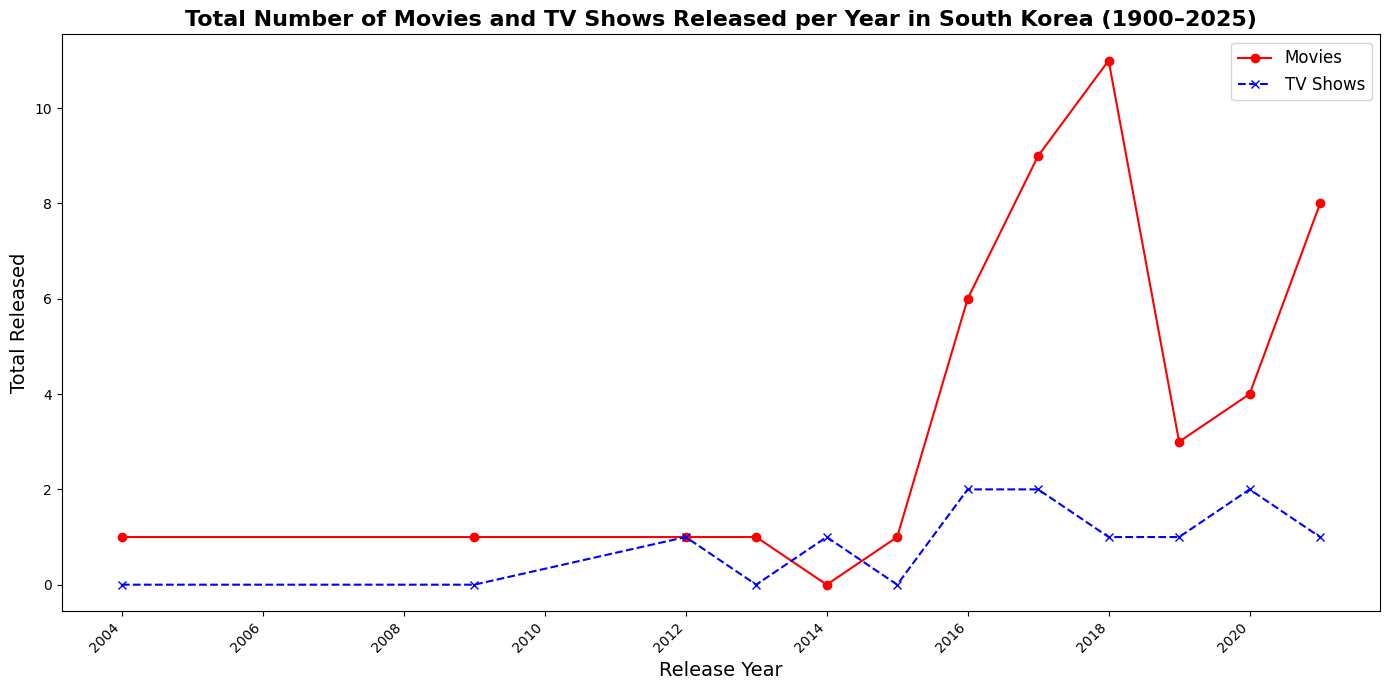

In [27]:
data = pd.read_csv("cleaned_netflix.csv")

data_korea = data[data['country'].str.contains('South Korea', na=False)]
print('Graph for total number of Movies and TV Shows released per year in Netflix OTT (South Korea only)')
filtered_df = data_korea[(data_korea['release_year'] >= 1900) & (data_korea['release_year'] <= 2025)]

movies_per_year = filtered_df[filtered_df['type'] == 'Movie'].groupby('release_year').size().reset_index(name='total_movies')
tv_per_year = filtered_df[filtered_df['type'] == 'TV Show'].groupby('release_year').size().reset_index(name='total_tv_shows')

merged = pd.merge(movies_per_year, tv_per_year, on='release_year', how='outer').fillna(0)
merged = merged.sort_values('release_year')

plt.figure(figsize=(14, 7))
plt.plot(merged['release_year'], merged['total_movies'], marker='o', linestyle='-', color='r', label='Movies')
plt.plot(merged['release_year'], merged['total_tv_shows'], marker='x', linestyle='--', color='b', label='TV Shows')

plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Total Released', fontsize=14)
plt.title('Total Number of Movies and TV Shows Released per Year in South Korea (1900–2025)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)

plt.xticks(ticks=range(int(merged['release_year'].min()), int(merged['release_year'].max())+1, 2), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Graph for total number of Movies and TV Shows released per year in Netflix OTT (USA only)


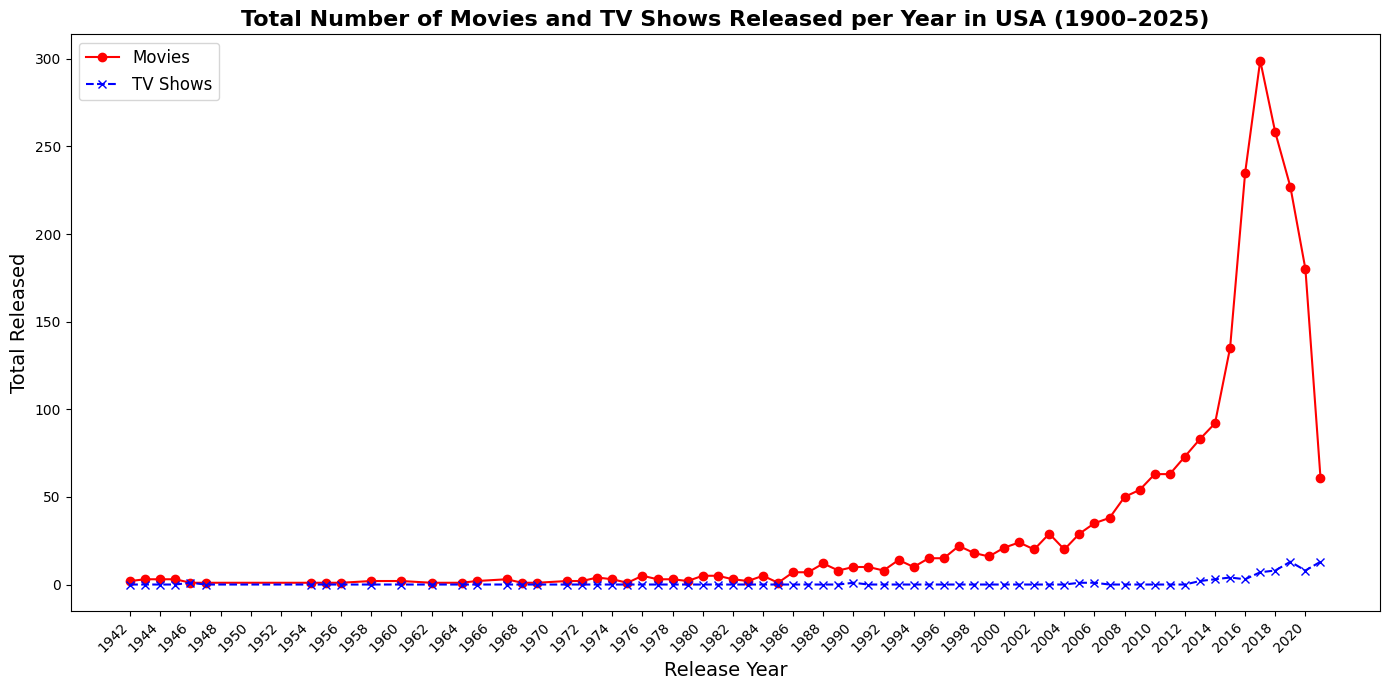

In [28]:
data = pd.read_csv("cleaned_netflix.csv")

data_usa = data[data['country'].str.contains('United States', na=False)]

print('Graph for total number of Movies and TV Shows released per year in Netflix OTT (USA only)')

filtered_df = data_usa[(data_usa['release_year'] >= 1900) & (data_usa['release_year'] <= 2025)]

movies_per_year = filtered_df[filtered_df['type'] == 'Movie'].groupby('release_year').size().reset_index(name='total_movies')
tv_per_year = filtered_df[filtered_df['type'] == 'TV Show'].groupby('release_year').size().reset_index(name='total_tv_shows')

merged = pd.merge(movies_per_year, tv_per_year, on='release_year', how='outer').fillna(0)
merged = merged.sort_values('release_year')

plt.figure(figsize=(14, 7))
plt.plot(merged['release_year'], merged['total_movies'], marker='o', linestyle='-', color='r', label='Movies')
plt.plot(merged['release_year'], merged['total_tv_shows'], marker='x', linestyle='--', color='b', label='TV Shows')

plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Total Released', fontsize=14)
plt.title('Total Number of Movies and TV Shows Released per Year in USA (1900–2025)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)

plt.xticks(ticks=range(int(merged['release_year'].min()), int(merged['release_year'].max())+1, 2), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Disclaimer: The Netflix dataset includes Thunderbolt (1947), a documentary film originally released in 1947, predating Netflix's founding in 1997. This film was added to Netflix’s catalog at a later date as part of their curated content, which may include classic or historical titles. The "release date" in the dataset reflects the original theatrical release, not the date it was adopted by Netflix for streaming.
Graph for total number of Movies released per year in Netflix OTT


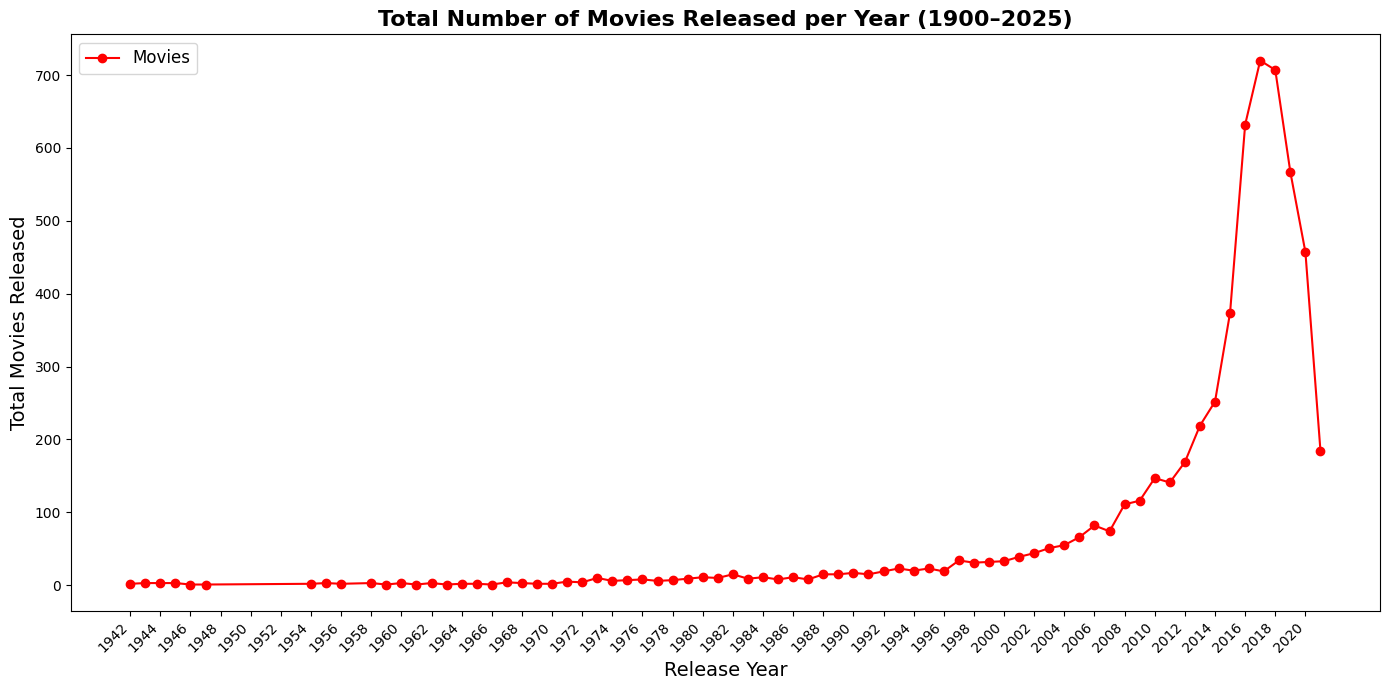

In [29]:
print('''Disclaimer: The Netflix dataset includes Thunderbolt (1947), a documentary film originally released in 1947, predating Netflix's founding in 1997. This film was added to Netflix’s catalog at a later date as part of their curated content, which may include classic or historical titles. The "release date" in the dataset reflects the original theatrical release, not the date it was adopted by Netflix for streaming.''')

data = pd.read_csv("cleaned_netflix.csv")


print('Graph for total number of Movies released per year in Netflix OTT')

filtered_df = data[(data['release_year'] >= 1900) & (data['release_year'] <= 2025)]

movies_per_year = filtered_df[filtered_df['type'] == 'Movie'].groupby('release_year').size().reset_index(name='total_movies')
movies_per_year = movies_per_year.sort_values('release_year')

plt.figure(figsize=(14, 7))
plt.plot(movies_per_year['release_year'], movies_per_year['total_movies'], marker='o', linestyle='-', color='r', label='Movies')

plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Total Movies Released', fontsize=14)
plt.title('Total Number of Movies Released per Year (1900–2025)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)


plt.xticks(ticks=range(int(movies_per_year['release_year'].min()), int(movies_per_year['release_year'].max())+1, 2), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Disclaimer: The Netflix dataset includes Thunderbolt (1947), a documentary film originally released in 1947, predating Netflix's founding in 1997. This film was added to Netflix’s catalog at a later date as part of their curated content, which may include classic or historical titles. The "release date" in the dataset reflects the original theatrical release, not the date it was adopted by Netflix for streaming.
Graph for total number of Movies released per year in Netflix OTT (India only)


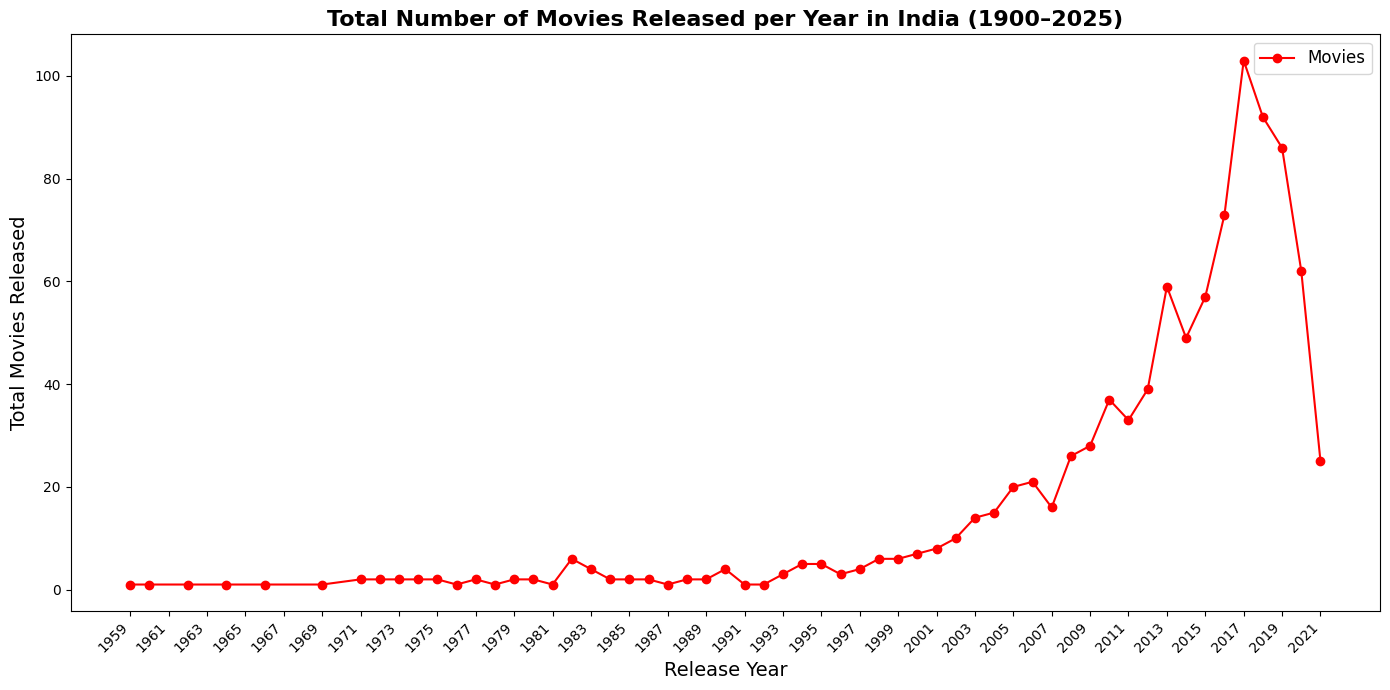

In [30]:
print('''Disclaimer: The Netflix dataset includes Thunderbolt (1947), a documentary film originally released in 1947, predating Netflix's founding in 1997. This film was added to Netflix’s catalog at a later date as part of their curated content, which may include classic or historical titles. The "release date" in the dataset reflects the original theatrical release, not the date it was adopted by Netflix for streaming.''')

data = pd.read_csv("cleaned_netflix.csv")

data_india = data[data['country'].str.contains('India', na=False)]

print('Graph for total number of Movies released per year in Netflix OTT (India only)')

filtered_df = data_india[(data_india['release_year'] >= 1900) & (data_india['release_year'] <= 2025)]

movies_per_year = filtered_df[filtered_df['type'] == 'Movie'].groupby('release_year').size().reset_index(name='total_movies')
movies_per_year = movies_per_year.sort_values('release_year')

plt.figure(figsize=(14, 7))
plt.plot(movies_per_year['release_year'], movies_per_year['total_movies'], marker='o', linestyle='-', color='r', label='Movies')

plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Total Movies Released', fontsize=14)
plt.title('Total Number of Movies Released per Year in India (1900–2025)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)

plt.xticks(ticks=range(int(movies_per_year['release_year'].min()), int(movies_per_year['release_year'].max())+1, 2), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Disclaimer: The Netflix dataset includes Thunderbolt (1947), a documentary film originally released in 1947, predating Netflix's founding in 1997. This film was added to Netflix’s catalog at a later date as part of their curated content, which may include classic or historical titles. The "release date" in the dataset reflects the original theatrical release, not the date it was adopted by Netflix for streaming.
Graph for total number of Movies released per year in Netflix OTT (South Korea only)


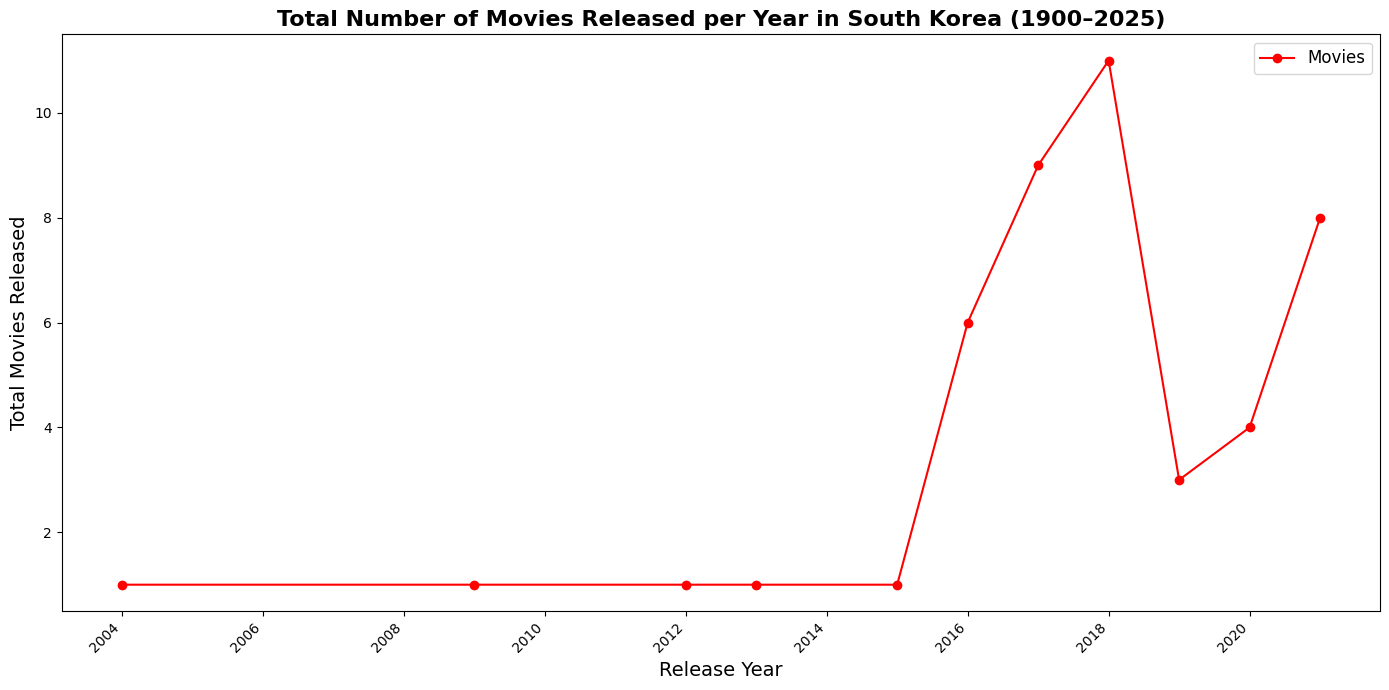

In [31]:
print('''Disclaimer: The Netflix dataset includes Thunderbolt (1947), a documentary film originally released in 1947, predating Netflix's founding in 1997. This film was added to Netflix’s catalog at a later date as part of their curated content, which may include classic or historical titles. The "release date" in the dataset reflects the original theatrical release, not the date it was adopted by Netflix for streaming.''')

data = pd.read_csv("cleaned_netflix.csv")

data_korea = data[data['country'].str.contains('South Korea', na=False)]

print('Graph for total number of Movies released per year in Netflix OTT (South Korea only)')

filtered_df = data_korea[(data_korea['release_year'] >= 1900) & (data_korea['release_year'] <= 2025)]

movies_per_year = filtered_df[filtered_df['type'] == 'Movie'].groupby('release_year').size().reset_index(name='total_movies')
movies_per_year = movies_per_year.sort_values('release_year')

plt.figure(figsize=(14, 7))
plt.plot(movies_per_year['release_year'], movies_per_year['total_movies'], marker='o', linestyle='-', color='r', label='Movies')

plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Total Movies Released', fontsize=14)
plt.title('Total Number of Movies Released per Year in South Korea (1900–2025)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)

plt.xticks(ticks=range(int(movies_per_year['release_year'].min()), int(movies_per_year['release_year'].max())+1, 2), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Disclaimer: The Netflix dataset includes Thunderbolt (1947), a documentary film originally released in 1947, predating Netflix's founding in 1997. This film was added to Netflix’s catalog at a later date as part of their curated content, which may include classic or historical titles. The "release date" in the dataset reflects the original theatrical release, not the date it was adopted by Netflix for streaming.
Graph for total number of Movies released per year in Netflix OTT (USA only)


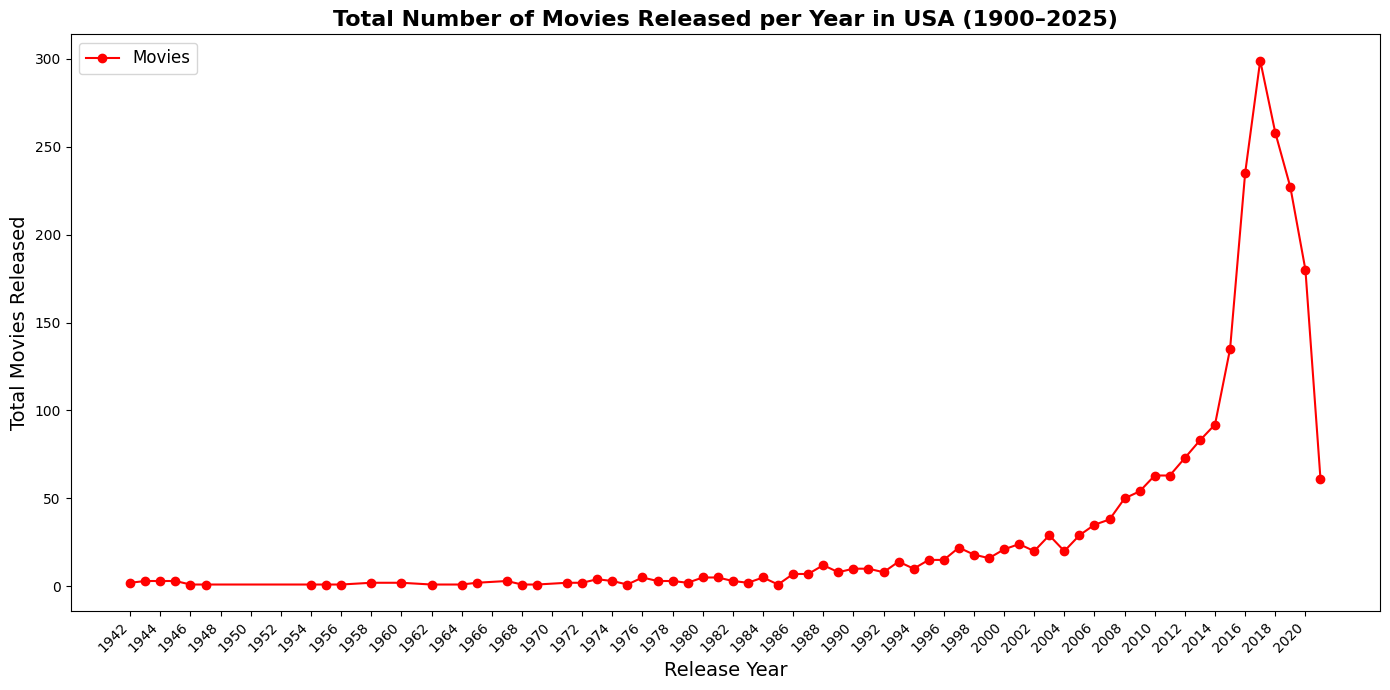

In [32]:
print('''Disclaimer: The Netflix dataset includes Thunderbolt (1947), a documentary film originally released in 1947, predating Netflix's founding in 1997. This film was added to Netflix’s catalog at a later date as part of their curated content, which may include classic or historical titles. The "release date" in the dataset reflects the original theatrical release, not the date it was adopted by Netflix for streaming.''')

data = pd.read_csv("cleaned_netflix.csv")

data_usa = data[data['country'].str.contains('United States', na=False)]

print('Graph for total number of Movies released per year in Netflix OTT (USA only)')

filtered_df = data_usa[(data_usa['release_year'] >= 1900) & (data_usa['release_year'] <= 2025)]

movies_per_year = filtered_df[filtered_df['type'] == 'Movie'].groupby('release_year').size().reset_index(name='total_movies')
movies_per_year = movies_per_year.sort_values('release_year')

plt.figure(figsize=(14, 7))
plt.plot(movies_per_year['release_year'], movies_per_year['total_movies'], marker='o', linestyle='-', color='r', label='Movies')

plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Total Movies Released', fontsize=14)
plt.title('Total Number of Movies Released per Year in USA (1900–2025)', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)

plt.xticks(ticks=range(int(movies_per_year['release_year'].min()), int(movies_per_year['release_year'].max())+1, 2), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Mean year: 2018.8172442941673
Median year: 2019.0
Mode year: 2019


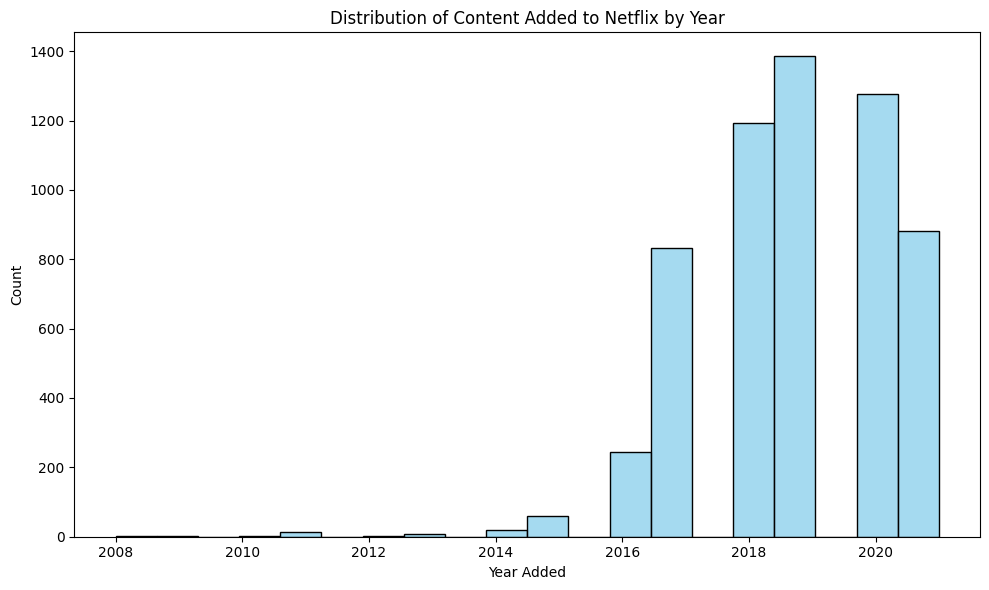

In [35]:
data = pd.read_csv("cleaned_netflix.csv")


data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data = data.dropna(subset=['date_added'])

data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month
data['day_added'] = data['date_added'].dt.day

mean_year = data['year_added'].mean()
median_year = data['year_added'].median()
mode_year = data['year_added'].mode()[0] if not data['year_added'].mode().empty else None

print(f"Mean year: {mean_year}")
print(f"Median year: {median_year}")
print(f"Mode year: {mode_year}")

plt.figure(figsize=(10,6))
sns.histplot(data['year_added'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Content Added to Netflix by Year')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("year_added_distribution.png", dpi=300)
plt.show()

Mean release year: 2013.0147083685545
Median release year: 2016.0
Mode release year: 2017


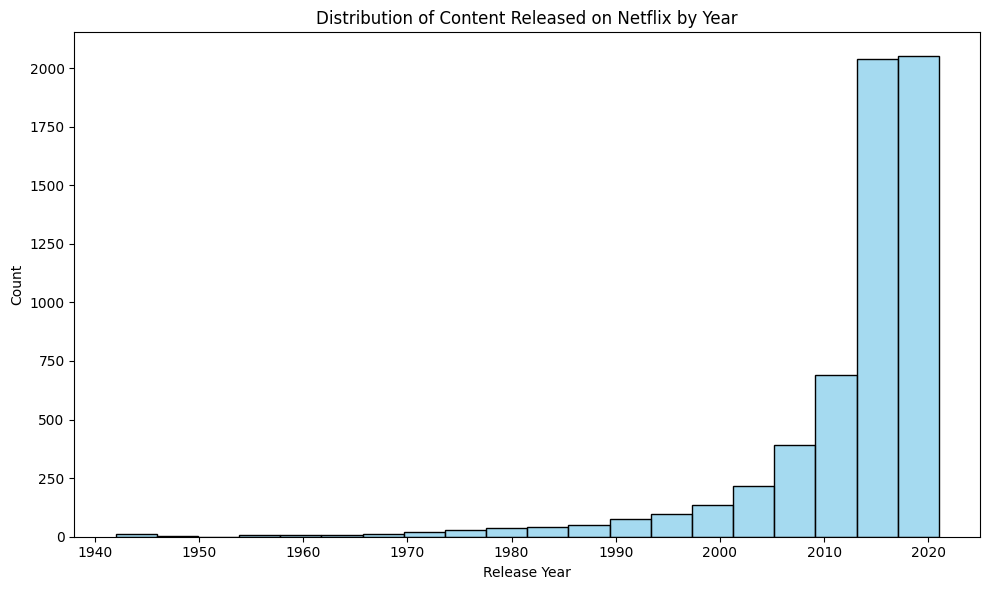

In [36]:
data = pd.read_csv("cleaned_netflix.csv")

data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data = data.dropna(subset=['date_added'])

data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month
data['day_added'] = data['date_added'].dt.day

mean_year = data['release_year'].mean()
median_year = data['release_year'].median()
mode_year = data['release_year'].mode()[0] if not data['release_year'].mode().empty else None

print(f"Mean release year: {mean_year}")
print(f"Median release year: {median_year}")
print(f"Mode release year: {mode_year}")

plt.figure(figsize=(10,6))
sns.histplot(data['release_year'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Content Released on Netflix by Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("release_year_distribution.png", dpi=300)
plt.show()

Mean year (India): 2018.7958974358974
Median year (India): 2019.0
Mode year (India): 2018


/tmp/ipython-input-37-28613722.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_india['date_added'] = pd.to_datetime(data_india['date_added'], errors='coerce')


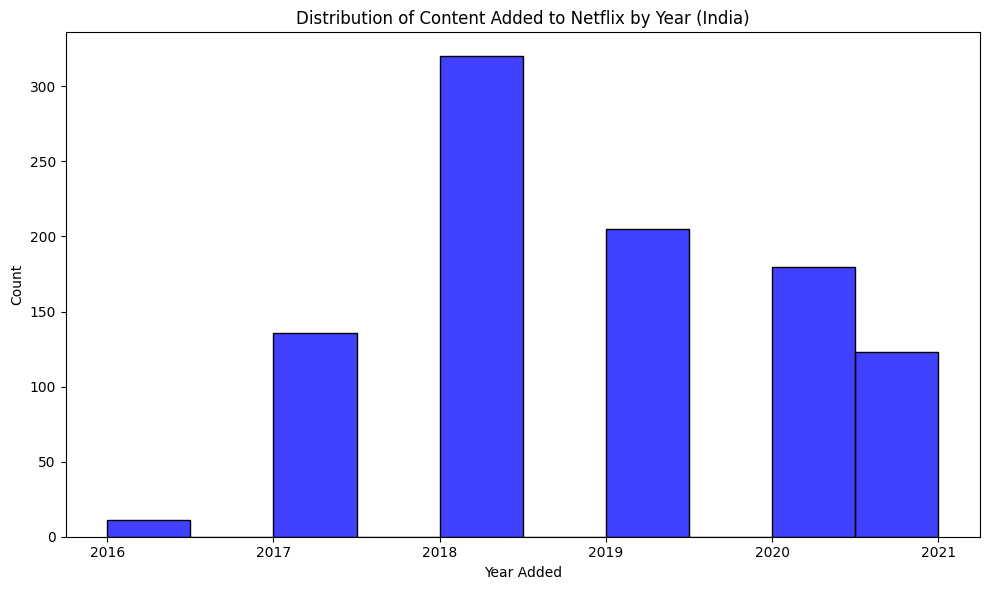

In [37]:
data = pd.read_csv("cleaned_netflix.csv")

data_india = data[data['country'].str.contains('India', na=False)]

data_india['date_added'] = pd.to_datetime(data_india['date_added'], errors='coerce')
data_india = data_india.dropna(subset=['date_added'])

data_india['year_added'] = data_india['date_added'].dt.year
data_india['month_added'] = data_india['date_added'].dt.month
data_india['day_added'] = data_india['date_added'].dt.day

mean_year = data_india['year_added'].mean()
median_year = data_india['year_added'].median()
mode_year = data_india['year_added'].mode()[0] if not data_india['year_added'].mode().empty else None

print(f"Mean year (India): {mean_year}")
print(f"Median year (India): {median_year}")
print(f"Mode year (India): {mode_year}")

plt.figure(figsize=(10,6))
sns.histplot(data_india['year_added'], bins=10, kde=False, color='blue')
plt.title('Distribution of Content Added to Netflix by Year (India)')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

/tmp/ipython-input-38-705814468.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_usa['date_added'] = pd.to_datetime(data_usa['date_added'], errors='coerce')


Mean release year (USA): 2011.9358600583091
Median release year (USA): 2016.0
Mode release year (USA): 2017


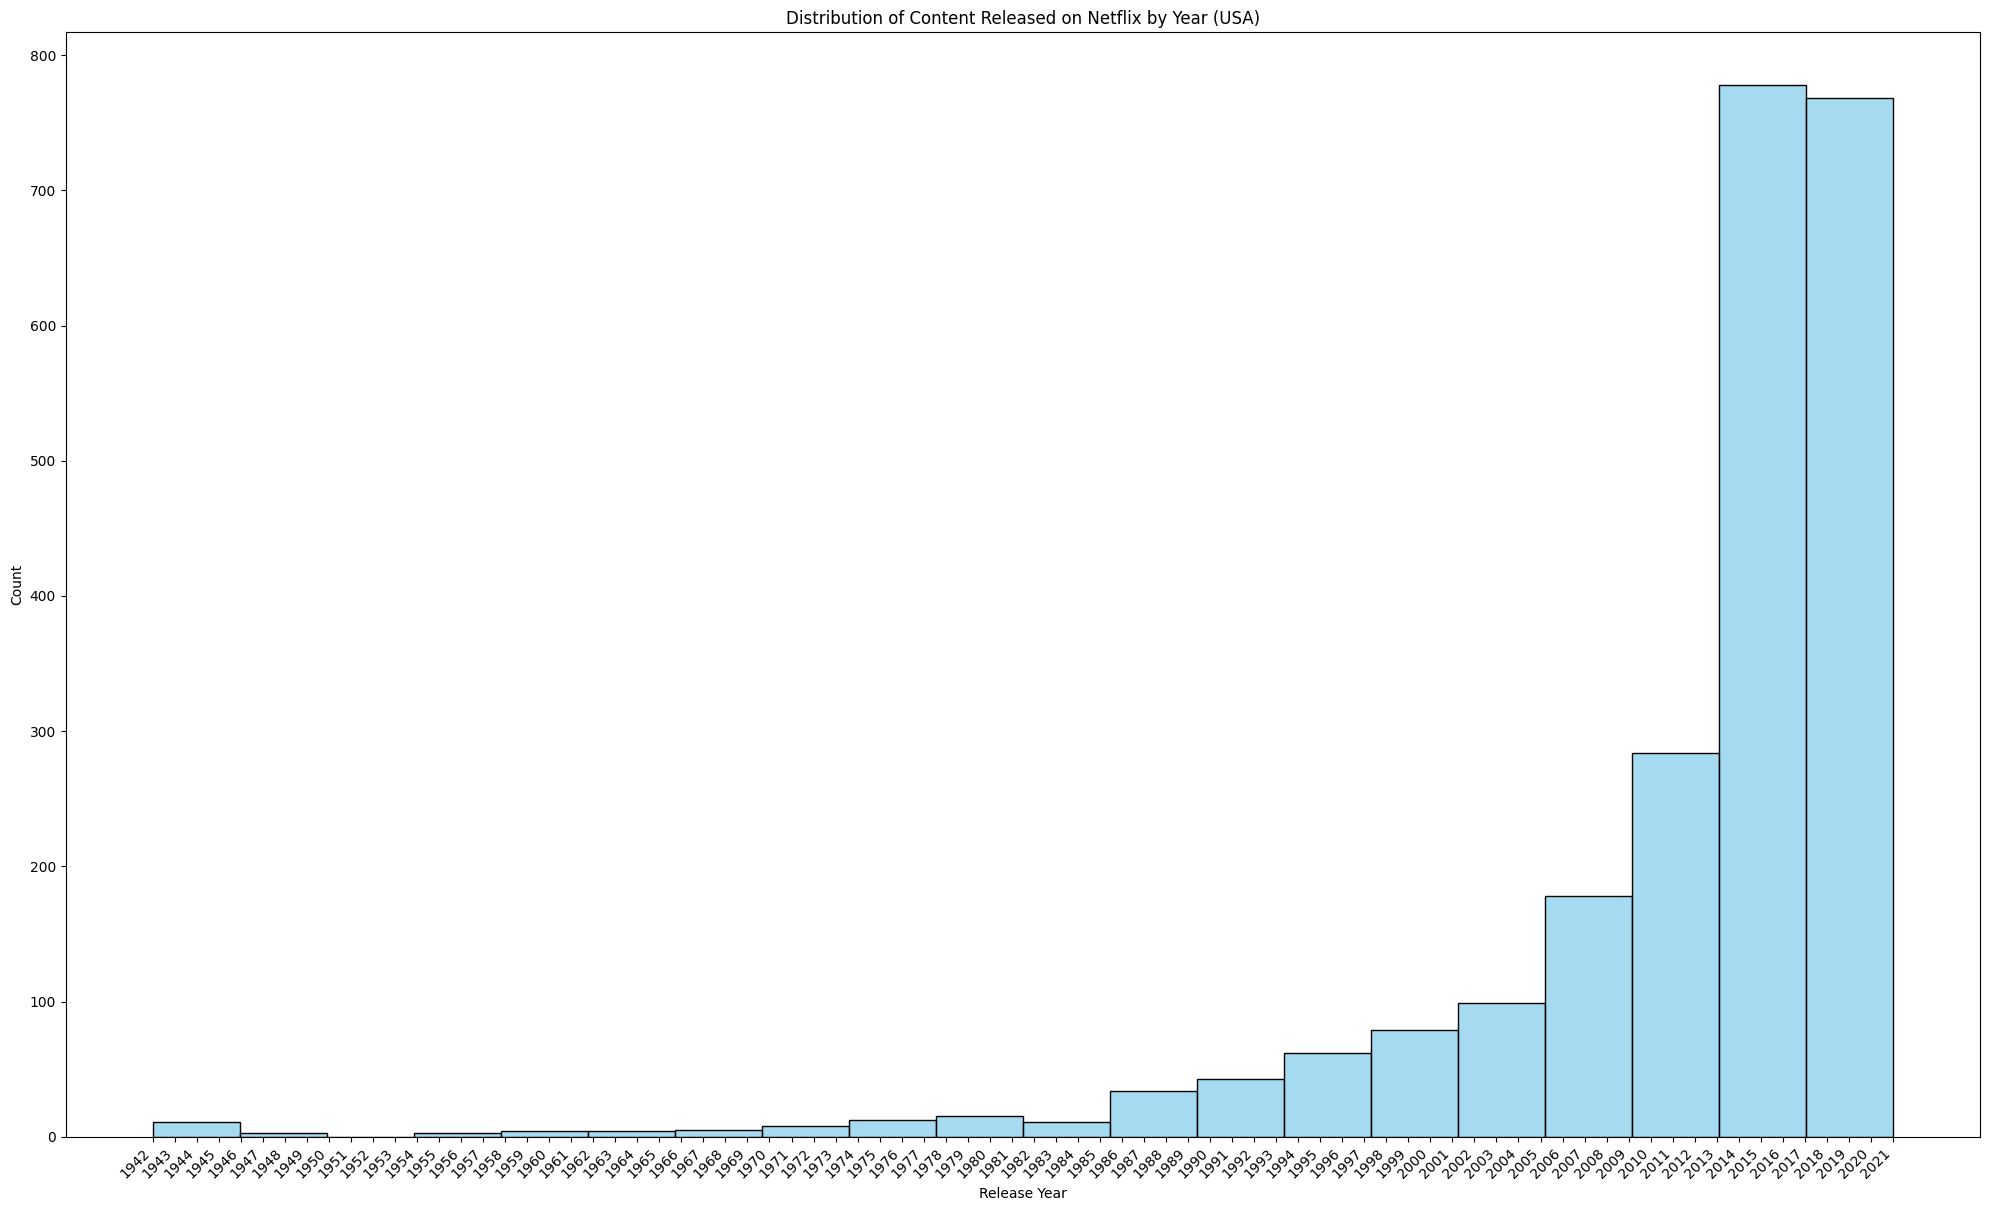

In [38]:
data = pd.read_csv("cleaned_netflix.csv")

data_usa = data[data['country'].str.contains('United States', na=False)]

data_usa['date_added'] = pd.to_datetime(data_usa['date_added'], errors='coerce')
data_usa = data_usa.dropna(subset=['date_added'])

data_usa['year_added'] = data_usa['date_added'].dt.year
data_usa['month_added'] = data_usa['date_added'].dt.month
data_usa['day_added'] = data_usa['date_added'].dt.day

mean_year = data_usa['release_year'].mean()
median_year = data_usa['release_year'].median()
mode_year = data_usa['release_year'].mode()[0] if not data_usa['release_year'].mode().empty else None

print(f"Mean release year (USA): {mean_year}")
print(f"Median release year (USA): {median_year}")
print(f"Mode release year (USA): {mode_year}")

plt.figure(figsize=(20,12))
sns.histplot(data_usa['release_year'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Content Released on Netflix by Year (USA)')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.tight_layout()

plt.xticks(
    ticks=range(int(data_usa['release_year'].min()), int(data_usa['release_year'].max()) + 1, 1),
    rotation=45,
    ha='right'
)
plt.show()

/tmp/ipython-input-39-2467016062.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_korea['date_added'] = pd.to_datetime(data_korea['date_added'], errors='coerce')


Mean year (South Korea): 2018.859649122807
Median year (South Korea): 2019.0
Mode year (South Korea): 2018


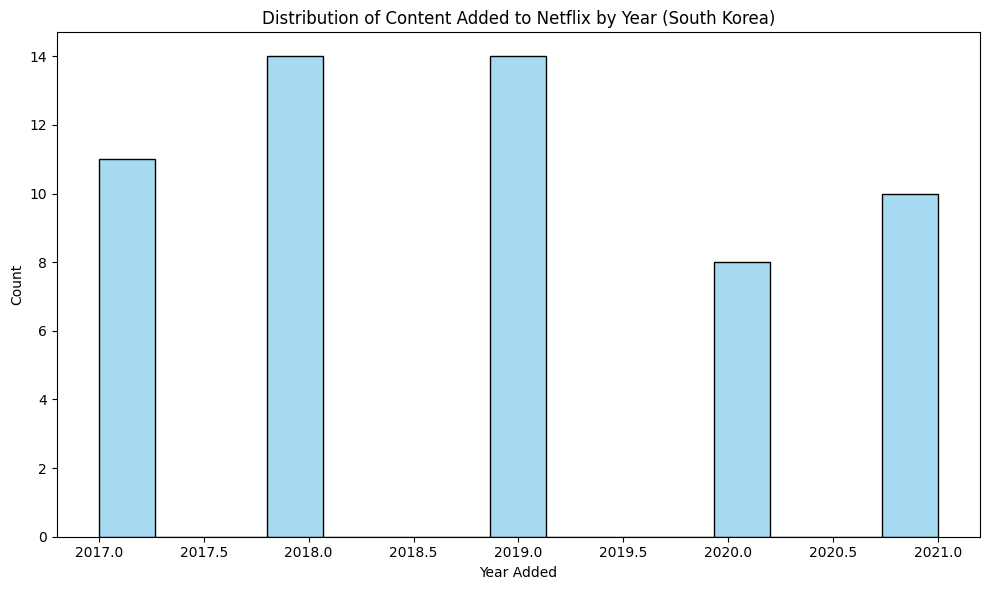

In [39]:
data = pd.read_csv("cleaned_netflix.csv")

data_korea = data[data['country'].str.contains('South Korea', na=False)]

data_korea['date_added'] = pd.to_datetime(data_korea['date_added'], errors='coerce')
data_korea = data_korea.dropna(subset=['date_added'])

data_korea['year_added'] = data_korea['date_added'].dt.year
data_korea['month_added'] = data_korea['date_added'].dt.month
data_korea['day_added'] = data_korea['date_added'].dt.day

mean_year = data_korea['year_added'].mean()
median_year = data_korea['year_added'].median()
mode_year = data_korea['year_added'].mode()[0] if not data_korea['year_added'].mode().empty else None

print(f"Mean year (South Korea): {mean_year}")
print(f"Median year (South Korea): {median_year}")
print(f"Mode year (South Korea): {mode_year}")

plt.figure(figsize=(10,6))
sns.histplot(data_korea['year_added'], bins=15, kde=False, color='skyblue')
plt.title('Distribution of Content Added to Netflix by Year (South Korea)')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

/tmp/ipython-input-40-656093112.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_korea['date_added'] = pd.to_datetime(data_korea['date_added'], errors='coerce')


Mean release year (South Korea): 2017.4561403508771
Median release year (South Korea): 2018.0
Mode release year (South Korea): 2018


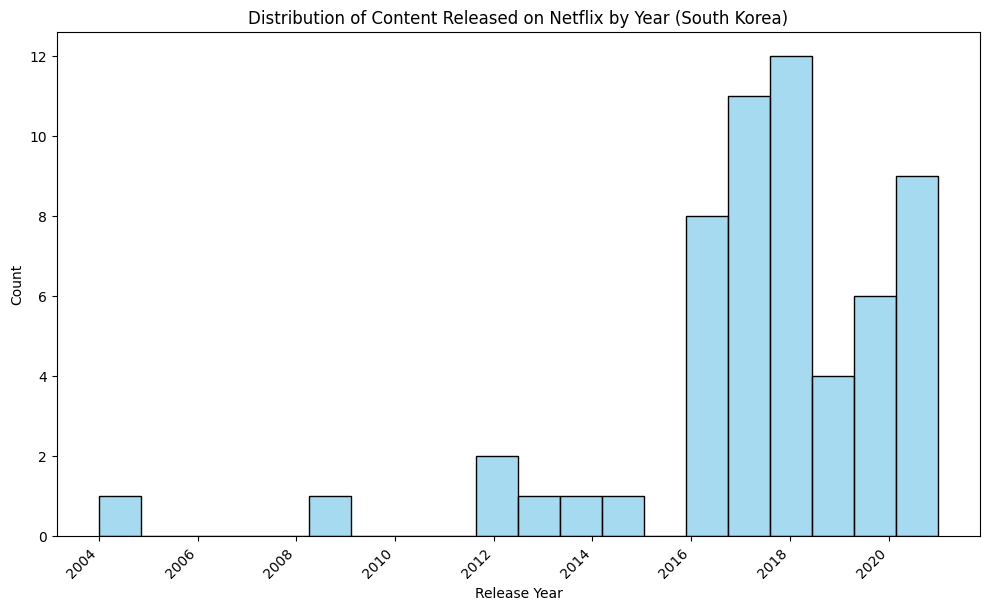

In [40]:
data = pd.read_csv("cleaned_netflix.csv")

data_korea = data[data['country'].str.contains('South Korea', na=False)]

data_korea['date_added'] = pd.to_datetime(data_korea['date_added'], errors='coerce')
data_korea = data_korea.dropna(subset=['date_added'])

data_korea['year_added'] = data_korea['date_added'].dt.year
data_korea['month_added'] = data_korea['date_added'].dt.month
data_korea['day_added'] = data_korea['date_added'].dt.day

mean_year = data_korea['release_year'].mean()
median_year = data_korea['release_year'].median()
mode_year = data_korea['release_year'].mode()[0] if not data_korea['release_year'].mode().empty else None

print(f"Mean release year (South Korea): {mean_year}")
print(f"Median release year (South Korea): {median_year}")
print(f"Mode release year (South Korea): {mode_year}")

plt.figure(figsize=(10,6))
sns.histplot(data_korea['release_year'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Content Released on Netflix by Year (South Korea)')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(
    ticks=range(int(data_korea['release_year'].min()), int(data_korea['release_year'].max()) + 1, 2),
    rotation=45,
    ha='right'
)
plt.show()

/tmp/ipython-input-41-3785162153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_usa['date_added'] = pd.to_datetime(data_usa['date_added'], errors='coerce')


Mean year (USA): 2018.80508121616
Median year (USA): 2019.0
Mode year (USA): 2019


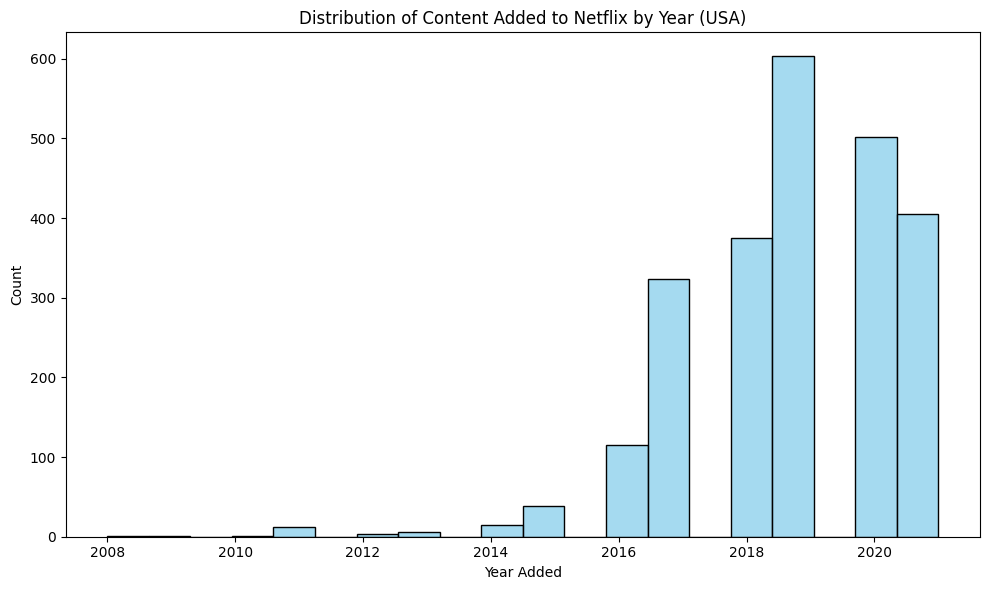

In [41]:
data = pd.read_csv("cleaned_netflix.csv")

data_usa = data[data['country'].str.contains('United States', na=False)]

data_usa['date_added'] = pd.to_datetime(data_usa['date_added'], errors='coerce')
data_usa = data_usa.dropna(subset=['date_added'])

data_usa['year_added'] = data_usa['date_added'].dt.year
data_usa['month_added'] = data_usa['date_added'].dt.month
data_usa['day_added'] = data_usa['date_added'].dt.day

mean_year = data_usa['year_added'].mean()
median_year = data_usa['year_added'].median()
mode_year = data_usa['year_added'].mode()[0] if not data_usa['year_added'].mode().empty else None

print(f"Mean year (USA): {mean_year}")
print(f"Median year (USA): {median_year}")
print(f"Mode year (USA): {mode_year}")

plt.figure(figsize=(10,6))
sns.histplot(data_usa['year_added'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Content Added to Netflix by Year (USA)')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

/tmp/ipython-input-42-705814468.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_usa['date_added'] = pd.to_datetime(data_usa['date_added'], errors='coerce')


Mean release year (USA): 2011.9358600583091
Median release year (USA): 2016.0
Mode release year (USA): 2017


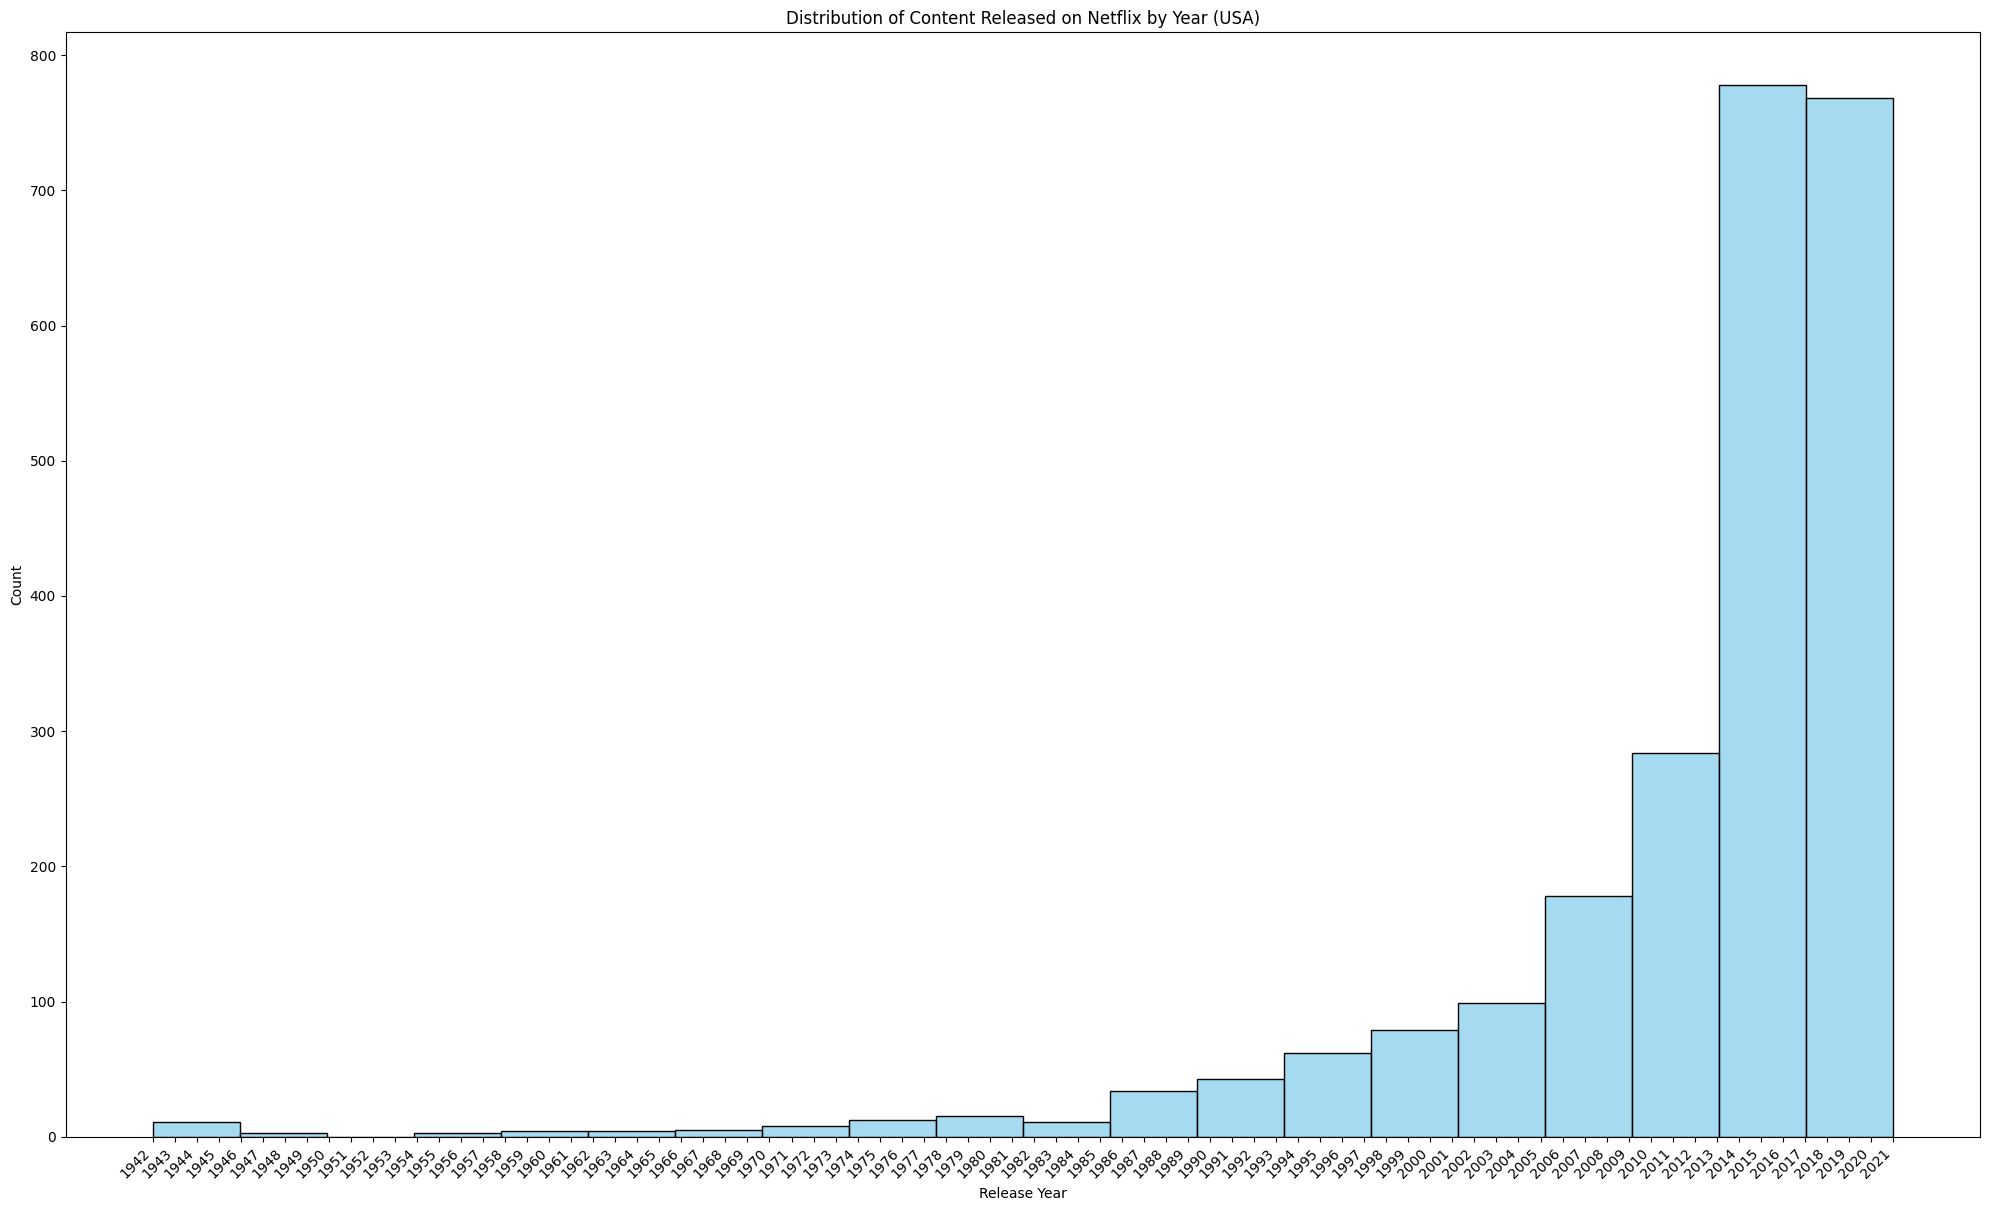

In [42]:
data = pd.read_csv("cleaned_netflix.csv")

data_usa = data[data['country'].str.contains('United States', na=False)]

data_usa['date_added'] = pd.to_datetime(data_usa['date_added'], errors='coerce')
data_usa = data_usa.dropna(subset=['date_added'])

data_usa['year_added'] = data_usa['date_added'].dt.year
data_usa['month_added'] = data_usa['date_added'].dt.month
data_usa['day_added'] = data_usa['date_added'].dt.day

mean_year = data_usa['release_year'].mean()
median_year = data_usa['release_year'].median()
mode_year = data_usa['release_year'].mode()[0] if not data_usa['release_year'].mode().empty else None

print(f"Mean release year (USA): {mean_year}")
print(f"Median release year (USA): {median_year}")
print(f"Mode release year (USA): {mode_year}")

plt.figure(figsize=(20,12))
sns.histplot(data_usa['release_year'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of Content Released on Netflix by Year (USA)')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.tight_layout()

plt.xticks(
    ticks=range(int(data_usa['release_year'].min()), int(data_usa['release_year'].max()) + 1, 1),
    rotation=45,
    ha='right'
)
plt.show()